In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Taking data into pandas dataframe.
data = pd.read_csv("tumorsdata.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Dropping columns which we will not need
data.drop([data.columns[0],data.columns[32]],axis=1,inplace=True)

In [5]:
# Replacing Label values from string to integer.
data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [6]:
# Diving data into training, cross validation and testing data.
training_data = data.iloc[0:int(0.7*len(data))]
cv_data = data.iloc[int(0.7*len(data)):int(0.9*len(data))]
test_data = data.iloc[int(0.9*len(data)):]

In [7]:
# Taking labels of training data to a variable C.
C = training_data['diagnosis']

In [8]:
# Reshaping Labels to a column vector.
C = np.array(C).reshape(C.shape[0],1)

In [9]:
# Droping label column from training data.
X = training_data.drop(['diagnosis'],inplace=False,axis=1)

In [10]:
X = np.array(X)

In [11]:
X.shape

(398, 30)

In [12]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.406e+01, 1.718e+01, 8.975e+01, ..., 7.911e-02, 2.523e-01,
        6.609e-02],
       [1.351e+01, 1.889e+01, 8.810e+01, ..., 1.453e-01, 2.666e-01,
        7.686e-02],
       [1.280e+01, 1.746e+01, 8.305e+01, ..., 8.296e-02, 1.988e-01,
        7.053e-02]])

In [13]:
# Making training data to zero mean one standard deviation(Normailzing the Data).
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

In [14]:
X

array([[ 1.0216632 , -2.0838301 ,  1.19230004, ...,  2.15163653,
         2.43897521,  1.80864307],
       [ 1.74298549, -0.29058096,  1.6022434 , ...,  0.97974819,
        -0.32082216,  0.23866098],
       [ 1.49695308,  0.55387195,  1.48453689, ...,  1.82102823,
         0.9658905 ,  0.16299919],
       ...,
       [-0.07709517, -0.4337497 , -0.14914828, ..., -0.59787328,
        -0.65927381, -0.96614791],
       [-0.23086542, -0.01880301, -0.21611923, ...,  0.37904472,
        -0.44606418, -0.40026079],
       [-0.42936884, -0.36580522, -0.42109091, ..., -0.54104998,
        -1.45694621, -0.73285739]])

In [15]:
N_train = X.shape[0]
m = X.shape[1]

In [16]:
# Calculating Discriminant Score and taking it to sigmoid function.
def P(theta0,theta,X):
    
    discriminant_score = theta0 + np.matmul(X,theta)
    
    P_theta0_theta = 1/(1 + np.exp(-discriminant_score))
    
    return P_theta0_theta

In [17]:
# C is Ground Truth Label and we have divided the formula of loss into two parts, the lhs and rhs.
def neg_log_loss(C,P_theta0_theta):
    
    lhs_sum = np.matmul(C.T,np.log(P_theta0_theta))
    
    rhs_sum = np.matmul((1-C).T,np.log(1-P_theta0_theta))
    
    neg_log_loss_theta0_theta = -(1/C.shape[0])*(lhs_sum + rhs_sum)
    
    return neg_log_loss_theta0_theta

# Batch Gradient Descent

In [18]:
# Initializing Parameter
theta0_initial = 0
theta_initial = np.zeros((m,1))      
epsilon = 10**(-3)
tol = 10**(-4)

iterations = list()
neg_log_loss_history = list()
iteration_number = 0

# Starting Gradient Descent
while(True):
    
    P_initial = P(theta0_initial,theta_initial,X)       #initial posterior probability of a tumor being malignant
    
    # Updating Intial Guess toward the final answer for theta0 ans theta.
    theta0_final = theta0_initial - (epsilon * np.mean(P_initial - C))
    theta_final = theta_initial - ((1/N_train) * epsilon * np.matmul((P_initial - C).T,X).T)
    
    # Claculation Initial value of loss.
    neg_log_loss_initial = neg_log_loss(C, P_initial)
    
    # Final posterior probability of a tumor being malignant
    P_final = P(theta0_final,theta_final,X)
    
    # Claculation Final value of loss.
    neg_log_loss_final = neg_log_loss(C, P_final)
    
    # If the absolute value of difference between Initially Calculated loss and
    # Final loss is less than tolerence, it'll break out of the loop.
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        
        break
        
    theta0_initial = theta0_final # Else we make our final guess as initial again.
    theta_initial = theta_final
    
    iterations.append(iteration_number) # We are appending the iterations it takes to a list.
    neg_log_loss_history.append(neg_log_loss_initial[0][0])
    
    print("Iteration_number = ", iteration_number, "Cross Entropy Loss = ", neg_log_loss_initial[0][0])
    
    iteration_number = iteration_number + 1

Iteration_number =  0 Cross Entropy Loss =  0.6931471805599453
Iteration_number =  1 Cross Entropy Loss =  0.6910359538713008
Iteration_number =  2 Cross Entropy Loss =  0.6889383499481533
Iteration_number =  3 Cross Entropy Loss =  0.6868542781282622
Iteration_number =  4 Cross Entropy Loss =  0.684783647822604
Iteration_number =  5 Cross Entropy Loss =  0.6827263685313887
Iteration_number =  6 Cross Entropy Loss =  0.6806823498597804
Iteration_number =  7 Cross Entropy Loss =  0.6786515015333157
Iteration_number =  8 Cross Entropy Loss =  0.6766337334130184
Iteration_number =  9 Cross Entropy Loss =  0.6746289555102031
Iteration_number =  10 Cross Entropy Loss =  0.672637078000967
Iteration_number =  11 Cross Entropy Loss =  0.670658011240364
Iteration_number =  12 Cross Entropy Loss =  0.6686916657762627
Iteration_number =  13 Cross Entropy Loss =  0.6667379523628812
Iteration_number =  14 Cross Entropy Loss =  0.6647967819739982
Iteration_number =  15 Cross Entropy Loss =  0.662868

Iteration_number =  513 Cross Entropy Loss =  0.3164797025374578
Iteration_number =  514 Cross Entropy Loss =  0.31623144777266404
Iteration_number =  515 Cross Entropy Loss =  0.3159838107115925
Iteration_number =  516 Cross Entropy Loss =  0.3157367889103825
Iteration_number =  517 Cross Entropy Loss =  0.31549037993819284
Iteration_number =  518 Cross Entropy Loss =  0.31524458137711575
Iteration_number =  519 Cross Entropy Loss =  0.31499939082209105
Iteration_number =  520 Cross Entropy Loss =  0.31475480588082116
Iteration_number =  521 Cross Entropy Loss =  0.31451082417368714
Iteration_number =  522 Cross Entropy Loss =  0.31426744333366474
Iteration_number =  523 Cross Entropy Loss =  0.3140246610062418
Iteration_number =  524 Cross Entropy Loss =  0.3137824748493356
Iteration_number =  525 Cross Entropy Loss =  0.31354088253321133
Iteration_number =  526 Cross Entropy Loss =  0.31329988174040113
Iteration_number =  527 Cross Entropy Loss =  0.3130594701656238
Iteration_number

Iteration_number =  968 Cross Entropy Loss =  0.24354782772562383
Iteration_number =  969 Cross Entropy Loss =  0.24344307093439121
Iteration_number =  970 Cross Entropy Loss =  0.24333846782459123
Iteration_number =  971 Cross Entropy Loss =  0.24323401802960495
Iteration_number =  972 Cross Entropy Loss =  0.24312972118401982
Iteration_number =  973 Cross Entropy Loss =  0.24302557692362425
Iteration_number =  974 Cross Entropy Loss =  0.24292158488540289
Iteration_number =  975 Cross Entropy Loss =  0.2428177447075313
Iteration_number =  976 Cross Entropy Loss =  0.24271405602937152
Iteration_number =  977 Cross Entropy Loss =  0.24261051849146653
Iteration_number =  978 Cross Entropy Loss =  0.24250713173553615
Iteration_number =  979 Cross Entropy Loss =  0.24240389540447135
Iteration_number =  980 Cross Entropy Loss =  0.24230080914233013
Iteration_number =  981 Cross Entropy Loss =  0.24219787259433198
Iteration_number =  982 Cross Entropy Loss =  0.2420950854068538
Iteration_nu

As our loss decreases, it takes the probability distribution of model close to the probability distribution of data(Reducing the cross entropy).

In [19]:
CV_labels = np.array(cv_data['diagnosis']).reshape(cv_data.shape[0],1) #Taking the cross validation data labels into a variable.

In [20]:
cv_data.drop(['diagnosis'],axis=1,inplace=True)

C:\Users\rithi\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
cv_data = np.array(cv_data)

In [22]:
cv_data = (cv_data - np.mean(cv_data,axis=0))/np.std(cv_data,axis=0) #Normalizing Cross Validation Data

In [23]:
cv_data.shape

(114, 30)

In [24]:
cv_pred = P(theta0_final,theta_final,cv_data) #Calculating Predicted Posterior Probability on Cross Validation Data.

In [25]:
cv_pred = cv_pred > 0.5 # Boolean Masking (False means 0 means Benign and True means 1 means Malignant)

In [26]:
correct_pred = np.count_nonzero(cv_pred == CV_labels) # Comparision of predicted labels with actual labels

In [27]:
correct_pred

104

In [28]:
# Calculating accuracy through dividing total count(correct_pred) by the number of examples we have in cross validation data.
cv_percent_accuracy = correct_pred/cv_data.shape[0]

In [29]:
cv_percent_accuracy

0.9122807017543859

Text(0, 0.5, 'Cross Entropy Loss')

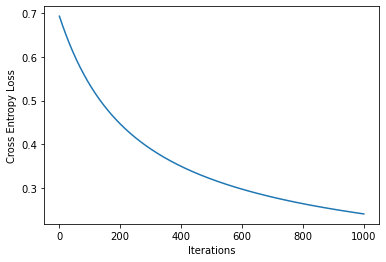

In [30]:
plt.plot(iterations,neg_log_loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cross Entropy Loss")

In [31]:
Test_labels = np.array(test_data['diagnosis']).reshape(test_data.shape[0],1) #Taking the testing data labels into a variable.

In [32]:
test_data.drop(['diagnosis'],axis=1,inplace=True)

In [33]:
test_data = np.array(test_data)

In [34]:
test_data = (test_data - np.mean(test_data,axis=0))/np.std(test_data,axis=0) #Normalizing Testing Data

In [35]:
test_data

array([[ 0.01148161, -0.19189959,  0.06995999, ...,  1.58960238,
         1.75997527,  1.8436301 ],
       [ 0.32063004, -1.59655286,  0.28327767, ..., -0.1326999 ,
        -0.22807086, -0.80612669],
       [ 0.44376543, -0.48880152,  0.39541104, ...,  0.17361561,
        -0.94119689, -0.86774894],
       ...,
       [ 0.84985024,  1.35608565,  0.81223002, ...,  0.62685305,
        -1.0738715 , -0.30003757],
       [ 1.89781103,  1.61203559,  2.01284991, ...,  2.50064006,
         2.80064175,  2.70240828],
       [-1.46614311,  0.63123542, -1.46743756, ..., -1.52982713,
         0.27982414, -0.8120267 ]])

In [36]:
P_test_data_batch = P(theta0_final,theta_final,test_data) #Calculating Predicted Posterior Probability on Testing Data.

In [37]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_batch_test_labels = P_test_data_batch > 0.5

In [38]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in testing data.
test_accuracy_batch = np.count_nonzero(predicted_batch_test_labels == Test_labels)/(test_data.shape[0])

In [39]:
test_accuracy_batch

0.9122807017543859

# Mini Batch Training

In [40]:
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)

iterations = list()
neg_log_loss_history = list()
iteration_number = 0
mini_batch_size = 2                         # providing batch size
time_steps = N_train//mini_batch_size       # Number of steps it take to train the complete data each time.
epoch_counter = 0


while(True):
    
    for i in range(0,time_steps):
        
        random_indices = np.random.choice(a=np.arange(0,N_train), size = mini_batch_size, replace = False)
        X_mini_batch = X[random_indices]
        train_labels_mini_batch = C[random_indices]
        
        P_initial = P(theta0_initial,theta_initial,X_mini_batch)

        theta0_final = theta0_initial - (epsilon * np.mean(P_initial - train_labels_mini_batch))
        theta_final = theta_initial - ((1/mini_batch_size) * epsilon * np.matmul((P_initial - train_labels_mini_batch).T,X_mini_batch).T)

        neg_log_loss_initial = neg_log_loss(train_labels_mini_batch, P_initial)

        P_final = P(theta0_final,theta_final,X_mini_batch)

        neg_log_loss_final = neg_log_loss(train_labels_mini_batch, P_final)

        theta0_initial = theta0_final
        theta_initial = theta_final

        iterations.append(iteration_number)
        neg_log_loss_history.append(neg_log_loss_initial[0][0])
        
        iteration_number = iteration_number + 1

        print("Iteration_number = ", iteration_number, "Cross Entropy Loss = ", neg_log_loss_initial[0][0])
        
    epoch_counter = epoch_counter + 1
        
    print("\n\nEnd of Epoch number", epoch_counter, "Cross Entropy Loss = ", neg_log_loss_initial[0][0],"\n\n")
    
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        break

Iteration_number =  1 Cross Entropy Loss =  0.6931471805599453
Iteration_number =  2 Cross Entropy Loss =  0.6922665720067762
Iteration_number =  3 Cross Entropy Loss =  0.6889726142003729
Iteration_number =  4 Cross Entropy Loss =  0.6853392580573825
Iteration_number =  5 Cross Entropy Loss =  0.6843280134334713
Iteration_number =  6 Cross Entropy Loss =  0.679059885897165
Iteration_number =  7 Cross Entropy Loss =  0.6857575814242038
Iteration_number =  8 Cross Entropy Loss =  0.6809754281372622
Iteration_number =  9 Cross Entropy Loss =  0.6878147358927211
Iteration_number =  10 Cross Entropy Loss =  0.672495952027024
Iteration_number =  11 Cross Entropy Loss =  0.6692896595150001
Iteration_number =  12 Cross Entropy Loss =  0.6747278049583507
Iteration_number =  13 Cross Entropy Loss =  0.6718436303150472
Iteration_number =  14 Cross Entropy Loss =  0.6780650185502366
Iteration_number =  15 Cross Entropy Loss =  0.675176752958515
Iteration_number =  16 Cross Entropy Loss =  0.67059

Iteration_number =  431 Cross Entropy Loss =  0.48478134894653196
Iteration_number =  432 Cross Entropy Loss =  0.28075493450456057
Iteration_number =  433 Cross Entropy Loss =  0.21720836014970485
Iteration_number =  434 Cross Entropy Loss =  0.1301407567372326
Iteration_number =  435 Cross Entropy Loss =  0.20403180575862195
Iteration_number =  436 Cross Entropy Loss =  0.624391306240963
Iteration_number =  437 Cross Entropy Loss =  0.46920545785981643
Iteration_number =  438 Cross Entropy Loss =  0.22019742413566223
Iteration_number =  439 Cross Entropy Loss =  0.2425690021319466
Iteration_number =  440 Cross Entropy Loss =  0.3167935726269825
Iteration_number =  441 Cross Entropy Loss =  0.14129099515861665
Iteration_number =  442 Cross Entropy Loss =  0.24011888543973695
Iteration_number =  443 Cross Entropy Loss =  0.36287553912337944
Iteration_number =  444 Cross Entropy Loss =  0.25432428384344996
Iteration_number =  445 Cross Entropy Loss =  0.4765269060309276
Iteration_number

Iteration_number =  913 Cross Entropy Loss =  0.27531283032594234
Iteration_number =  914 Cross Entropy Loss =  0.9055203954252083
Iteration_number =  915 Cross Entropy Loss =  0.26989463935362007
Iteration_number =  916 Cross Entropy Loss =  0.06567057584787857
Iteration_number =  917 Cross Entropy Loss =  0.17767449777805494
Iteration_number =  918 Cross Entropy Loss =  0.707235394758011
Iteration_number =  919 Cross Entropy Loss =  0.17901211889856458
Iteration_number =  920 Cross Entropy Loss =  0.21859171492520568
Iteration_number =  921 Cross Entropy Loss =  0.28228057100651366
Iteration_number =  922 Cross Entropy Loss =  0.13541745735786181
Iteration_number =  923 Cross Entropy Loss =  0.10069184276886284
Iteration_number =  924 Cross Entropy Loss =  0.13711005551034702
Iteration_number =  925 Cross Entropy Loss =  0.19416978055475906
Iteration_number =  926 Cross Entropy Loss =  0.12629076755287022
Iteration_number =  927 Cross Entropy Loss =  0.2932957926765415
Iteration_numb

Text(0, 0.5, 'Cross Entropy Loss')

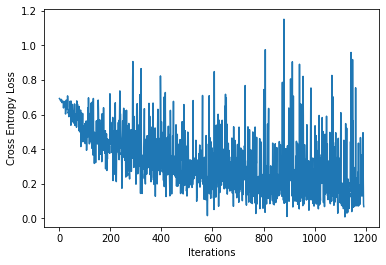

In [41]:
plt.plot(iterations,neg_log_loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cross Entropy Loss")

In [42]:
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)

iterations = list()
neg_log_loss_history = list()
iteration_number = 0
mini_batch_size = 199                             # providing batch size
time_steps = N_train//mini_batch_size             # Number of steps it take to train the complete data each time.
epoch_counter = 0


while(True):
    
    for i in range(0,time_steps):
        
        # Selecting row indices.
        random_indices = np.random.choice(a=np.arange(0,N_train), size = mini_batch_size, replace = False)
        X_mini_batch = X[random_indices] # Picking data from indices.
        train_labels_mini_batch = C[random_indices] # Picking lables from indices.
        
        P_initial = P(theta0_initial,theta_initial,X_mini_batch)

        theta0_final = theta0_initial - (epsilon * np.mean(P_initial - train_labels_mini_batch))
        theta_final = theta_initial - ((1/mini_batch_size) * epsilon * np.matmul((P_initial - train_labels_mini_batch).T,X_mini_batch).T)

        neg_log_loss_initial = neg_log_loss(train_labels_mini_batch, P_initial)

        P_final = P(theta0_final,theta_final,X_mini_batch)

        neg_log_loss_final = neg_log_loss(train_labels_mini_batch, P_final)

        theta0_initial = theta0_final
        theta_initial = theta_final

        iterations.append(iteration_number)
        neg_log_loss_history.append(neg_log_loss_initial[0][0])
        
        iteration_number = iteration_number + 1

        print("Iteration_number = ", iteration_number, "Cross Entropy Loss = ", neg_log_loss_initial[0][0])
        
    epoch_counter = epoch_counter + 1
        
    print("\n\nEnd of Epoch number", epoch_counter, "Cross Entropy Loss = ", neg_log_loss_initial[0][0],"\n\n")
    
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        break

Iteration_number =  1 Cross Entropy Loss =  0.6931471805599452
Iteration_number =  2 Cross Entropy Loss =  0.6911182234141401


End of Epoch number 1 Cross Entropy Loss =  0.6911182234141401 


Iteration_number =  3 Cross Entropy Loss =  0.6891117137717027
Iteration_number =  4 Cross Entropy Loss =  0.6875253193100079


End of Epoch number 2 Cross Entropy Loss =  0.6875253193100079 


Iteration_number =  5 Cross Entropy Loss =  0.6852278727165436
Iteration_number =  6 Cross Entropy Loss =  0.6825653240809647


End of Epoch number 3 Cross Entropy Loss =  0.6825653240809647 


Iteration_number =  7 Cross Entropy Loss =  0.6811801977837719
Iteration_number =  8 Cross Entropy Loss =  0.679097168983256


End of Epoch number 4 Cross Entropy Loss =  0.679097168983256 


Iteration_number =  9 Cross Entropy Loss =  0.6764202206763342
Iteration_number =  10 Cross Entropy Loss =  0.6746291522365288


End of Epoch number 5 Cross Entropy Loss =  0.6746291522365288 


Iteration_number =  11 Cross En

End of Epoch number 147 Cross Entropy Loss =  0.3956702873895696 


Iteration_number =  295 Cross Entropy Loss =  0.39464828200719004
Iteration_number =  296 Cross Entropy Loss =  0.3926813771736148


End of Epoch number 148 Cross Entropy Loss =  0.3926813771736148 


Iteration_number =  297 Cross Entropy Loss =  0.39075861141768453
Iteration_number =  298 Cross Entropy Loss =  0.3930683650485117


End of Epoch number 149 Cross Entropy Loss =  0.3930683650485117 


Iteration_number =  299 Cross Entropy Loss =  0.3732484971727016
Iteration_number =  300 Cross Entropy Loss =  0.3853104612705187


End of Epoch number 150 Cross Entropy Loss =  0.3853104612705187 


Iteration_number =  301 Cross Entropy Loss =  0.39258832236620705
Iteration_number =  302 Cross Entropy Loss =  0.36377232727199865


End of Epoch number 151 Cross Entropy Loss =  0.36377232727199865 


Iteration_number =  303 Cross Entropy Loss =  0.38149937131806755
Iteration_number =  304 Cross Entropy Loss =  0.3791087351671

Iteration_number =  602 Cross Entropy Loss =  0.3084980568891183


End of Epoch number 301 Cross Entropy Loss =  0.3084980568891183 


Iteration_number =  603 Cross Entropy Loss =  0.31201459990651287
Iteration_number =  604 Cross Entropy Loss =  0.28126872721460655


End of Epoch number 302 Cross Entropy Loss =  0.28126872721460655 


Iteration_number =  605 Cross Entropy Loss =  0.2973809150909209
Iteration_number =  606 Cross Entropy Loss =  0.291444694556483


End of Epoch number 303 Cross Entropy Loss =  0.291444694556483 


Iteration_number =  607 Cross Entropy Loss =  0.30303577269909165
Iteration_number =  608 Cross Entropy Loss =  0.29503596879687216


End of Epoch number 304 Cross Entropy Loss =  0.29503596879687216 


Iteration_number =  609 Cross Entropy Loss =  0.28877873946508087
Iteration_number =  610 Cross Entropy Loss =  0.29814461981758533


End of Epoch number 305 Cross Entropy Loss =  0.29814461981758533 


Iteration_number =  611 Cross Entropy Loss =  0.2956303097

Iteration_number =  910 Cross Entropy Loss =  0.2449676045936542


End of Epoch number 455 Cross Entropy Loss =  0.2449676045936542 


Iteration_number =  911 Cross Entropy Loss =  0.24362730122493875
Iteration_number =  912 Cross Entropy Loss =  0.23813815422261658


End of Epoch number 456 Cross Entropy Loss =  0.23813815422261658 


Iteration_number =  913 Cross Entropy Loss =  0.26233252904113025
Iteration_number =  914 Cross Entropy Loss =  0.24634173337583712


End of Epoch number 457 Cross Entropy Loss =  0.24634173337583712 


Iteration_number =  915 Cross Entropy Loss =  0.24762213737662409
Iteration_number =  916 Cross Entropy Loss =  0.23680489136397492


End of Epoch number 458 Cross Entropy Loss =  0.23680489136397492 


Iteration_number =  917 Cross Entropy Loss =  0.23959189455357777
Iteration_number =  918 Cross Entropy Loss =  0.23305103810224864


End of Epoch number 459 Cross Entropy Loss =  0.23305103810224864 


Iteration_number =  919 Cross Entropy Loss =  0.26205

Text(0, 0.5, 'Cross Entropy Loss')

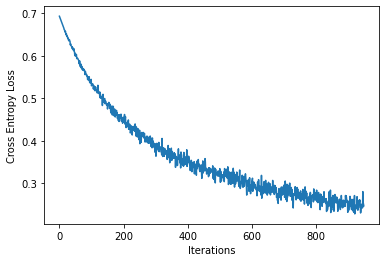

In [43]:
plt.plot(iterations,neg_log_loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cross Entropy Loss")

The difference we got between the above two graphs(second and third) is because Variance is Inversly Proportional to Sample Size(Central Limit Theorem). As the second Mini Batch Gradient Descent has batch size as 2 and the third one has batch size of 199.

In [44]:
theta0_mini_batch = theta0_final
theta_mini_batch = theta_final

In [45]:
# Calculating Predicted Posterior Probability on Training Data.
p_train_data_mini_batch = P(theta0_mini_batch, theta_mini_batch, X)

In [46]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_train_labels_mini_batch = p_train_data_mini_batch > 0.5

In [47]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in training data.
train_accuracy_mini_batch = np.count_nonzero(predicted_train_labels_mini_batch == C)/(X.shape[0])

In [48]:
train_accuracy_mini_batch

0.957286432160804

In [49]:
cv_data

array([[-0.89062436, -1.05378374, -0.90881458, ..., -0.88017935,
        -0.40577774,  0.57363125],
       [-0.64877296, -0.48481816, -0.67412159, ..., -0.91643148,
         0.0501271 , -0.09422582],
       [ 1.34813518,  0.39555657,  1.65573966, ...,  1.67269534,
         1.17420995,  2.39107837],
       ...,
       [ 0.54741097,  1.08159327,  0.67903754, ...,  2.03340399,
         0.61458072,  1.54740164],
       [-0.66838253, -1.08656365, -0.62433823, ...,  0.02684883,
        -0.37200701,  1.03797546],
       [ 0.33497393, -1.08422223,  0.24568525, ..., -0.4453351 ,
        -1.02329964, -1.3687573 ]])

In [50]:
# Calculating Predicted Posterior Probability on Cross Validation Data.
P_cv_data_mini_batch = P(theta0_mini_batch, theta_mini_batch, cv_data)

In [51]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_cv_labels_mini_batch = P_cv_data_mini_batch > 0.5

In [52]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in Cross Validation data.
cv_accuracy_mini_batch = np.count_nonzero(predicted_cv_labels_mini_batch == CV_labels)/(cv_data.shape[0])

In [53]:
cv_accuracy_mini_batch

0.9122807017543859

In [54]:
# Calculating Predicted Posterior Probability on Testing Data.
P_test_data_mini_batch = P(theta0_mini_batch,theta_mini_batch,test_data)

In [55]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_test_labels_mini_batch = P_test_data_mini_batch > 0.5

In [56]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in testing data.
test_accuracy_mini_batch = np.count_nonzero(predicted_test_labels_mini_batch == Test_labels)/(test_data.shape[0])

In [57]:
test_accuracy_mini_batch

0.9122807017543859

# Stochastic Training

In [58]:
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)

iterations = list()
neg_log_loss_history = list()
iteration_number = 0
mini_batch_size = 1
time_steps = N_train//mini_batch_size
epoch_counter = 0


while(True):
    
    for i in range(0,time_steps):
        
        random_indices = np.random.choice(a=np.arange(0,N_train), size = mini_batch_size, replace = False)
        X_mini_batch = X[random_indices]
        #X_min_batch = X_mini_batch.reshape(-1,X_mini_batch.shape[0])
        train_labels_mini_batch = C[random_indices]
        #train_labels_mini_batch = train_labels_mini_batch.reshape(-1,train_labels_mini_batch.shape[0])
        
        P_initial = P(theta0_initial,theta_initial,X_mini_batch)

        theta0_final = theta0_initial - (epsilon * np.mean(P_initial - train_labels_mini_batch))
        theta_final = theta_initial - ((1/mini_batch_size) * epsilon * np.matmul((P_initial - train_labels_mini_batch).T,X_mini_batch).T)

        neg_log_loss_initial = neg_log_loss(train_labels_mini_batch, P_initial)

        P_final = P(theta0_final,theta_final,X_mini_batch)

        neg_log_loss_final = neg_log_loss(train_labels_mini_batch, P_final)

        theta0_initial = theta0_final
        theta_initial = theta_final

        iterations.append(iteration_number)
        neg_log_loss_history.append(neg_log_loss_initial[0][0])
        
        iteration_number = iteration_number + 1

        print("Iteration_number = ", iteration_number, "Cross Entropy Loss = ", neg_log_loss_initial[0][0])
        
    epoch_counter = epoch_counter + 1
        
    print("\n\nEnd of Epoch number", epoch_counter, "Cross Entropy Loss = ", neg_log_loss_initial[0][0],"\n\n")
    
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        break

Iteration_number =  1 Cross Entropy Loss =  0.6931471805599453
Iteration_number =  2 Cross Entropy Loss =  0.6915488323985443
Iteration_number =  3 Cross Entropy Loss =  0.689372740299234
Iteration_number =  4 Cross Entropy Loss =  0.6924332822433097
Iteration_number =  5 Cross Entropy Loss =  0.6866280499148257
Iteration_number =  6 Cross Entropy Loss =  0.6553491839589276
Iteration_number =  7 Cross Entropy Loss =  0.6854685122206864
Iteration_number =  8 Cross Entropy Loss =  0.6885471725133627
Iteration_number =  9 Cross Entropy Loss =  0.6808122089063227
Iteration_number =  10 Cross Entropy Loss =  0.6891135868155631
Iteration_number =  11 Cross Entropy Loss =  0.6682152016829157
Iteration_number =  12 Cross Entropy Loss =  0.6722859604783471
Iteration_number =  13 Cross Entropy Loss =  0.6654714804735193
Iteration_number =  14 Cross Entropy Loss =  0.6562927331923154
Iteration_number =  15 Cross Entropy Loss =  0.6186958843473185
Iteration_number =  16 Cross Entropy Loss =  0.656

Iteration_number =  531 Cross Entropy Loss =  0.226727533917105
Iteration_number =  532 Cross Entropy Loss =  0.30303224204949875
Iteration_number =  533 Cross Entropy Loss =  0.5435374989629788
Iteration_number =  534 Cross Entropy Loss =  0.23058770720008634
Iteration_number =  535 Cross Entropy Loss =  0.15740153223633216
Iteration_number =  536 Cross Entropy Loss =  0.23117508155589694
Iteration_number =  537 Cross Entropy Loss =  0.28964330433531715
Iteration_number =  538 Cross Entropy Loss =  0.2939369695888792
Iteration_number =  539 Cross Entropy Loss =  0.36504274485597504
Iteration_number =  540 Cross Entropy Loss =  0.2167986509413569
Iteration_number =  541 Cross Entropy Loss =  0.3611822404998318
Iteration_number =  542 Cross Entropy Loss =  0.2754681725143224
Iteration_number =  543 Cross Entropy Loss =  0.3715959528406412
Iteration_number =  544 Cross Entropy Loss =  0.21228701197170835
Iteration_number =  545 Cross Entropy Loss =  0.7483921189074446
Iteration_number = 

Iteration_number =  941 Cross Entropy Loss =  0.19612224097232275
Iteration_number =  942 Cross Entropy Loss =  0.08241493032164006
Iteration_number =  943 Cross Entropy Loss =  0.3714922811622936
Iteration_number =  944 Cross Entropy Loss =  0.19695895431220542
Iteration_number =  945 Cross Entropy Loss =  0.29157711785804163
Iteration_number =  946 Cross Entropy Loss =  0.2514594004339664
Iteration_number =  947 Cross Entropy Loss =  0.13072847961393472
Iteration_number =  948 Cross Entropy Loss =  0.29039504135065
Iteration_number =  949 Cross Entropy Loss =  0.2005488605517886
Iteration_number =  950 Cross Entropy Loss =  0.14438475359028502
Iteration_number =  951 Cross Entropy Loss =  0.1861283761288956
Iteration_number =  952 Cross Entropy Loss =  0.16364965084488714
Iteration_number =  953 Cross Entropy Loss =  0.4272870277422115
Iteration_number =  954 Cross Entropy Loss =  0.5084865383064522
Iteration_number =  955 Cross Entropy Loss =  0.22081976977382037
Iteration_number = 

Iteration_number =  1403 Cross Entropy Loss =  0.09407114182941653
Iteration_number =  1404 Cross Entropy Loss =  0.3987292395389466
Iteration_number =  1405 Cross Entropy Loss =  0.024998156032470246
Iteration_number =  1406 Cross Entropy Loss =  0.25681216736059687
Iteration_number =  1407 Cross Entropy Loss =  0.06175351870543949
Iteration_number =  1408 Cross Entropy Loss =  0.20072291581066762
Iteration_number =  1409 Cross Entropy Loss =  0.03127595075328461
Iteration_number =  1410 Cross Entropy Loss =  0.45281147672487454
Iteration_number =  1411 Cross Entropy Loss =  0.6762408073788944
Iteration_number =  1412 Cross Entropy Loss =  0.09600681892009308
Iteration_number =  1413 Cross Entropy Loss =  0.006443344118407427
Iteration_number =  1414 Cross Entropy Loss =  0.18301799326177604
Iteration_number =  1415 Cross Entropy Loss =  0.0022099795365248445
Iteration_number =  1416 Cross Entropy Loss =  0.0577390043975425
Iteration_number =  1417 Cross Entropy Loss =  0.080804108911

Iteration_number =  1902 Cross Entropy Loss =  0.08575720264625698
Iteration_number =  1903 Cross Entropy Loss =  0.4050790615498559
Iteration_number =  1904 Cross Entropy Loss =  0.011087353348628624
Iteration_number =  1905 Cross Entropy Loss =  0.00015103007750036327
Iteration_number =  1906 Cross Entropy Loss =  0.0015957169431758177
Iteration_number =  1907 Cross Entropy Loss =  0.01530607020790909
Iteration_number =  1908 Cross Entropy Loss =  0.5964670929604282
Iteration_number =  1909 Cross Entropy Loss =  0.057490958262944786
Iteration_number =  1910 Cross Entropy Loss =  0.4318252003446586
Iteration_number =  1911 Cross Entropy Loss =  0.24285121207790758
Iteration_number =  1912 Cross Entropy Loss =  0.07170246332622186
Iteration_number =  1913 Cross Entropy Loss =  0.3621552074020492
Iteration_number =  1914 Cross Entropy Loss =  0.06668684440721268
Iteration_number =  1915 Cross Entropy Loss =  0.14686569897801774
Iteration_number =  1916 Cross Entropy Loss =  0.0714163253

Text(0, 0.5, 'Cross Entropy Loss')

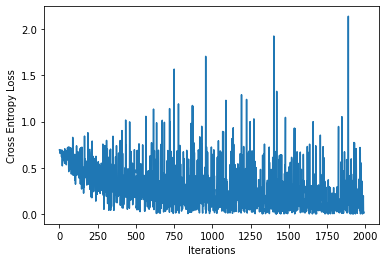

In [59]:
plt.plot(iterations,neg_log_loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cross Entropy Loss")

In [60]:
theta0_stochastic = theta0_final
theta_stochastic = theta_final

In [61]:
# Calculating Predicted Posterior Probability on Cross Validation Data.
P_cv_data_stochastic = P(theta0_stochastic, theta_stochastic, cv_data)

In [62]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_cv_labels_stochastic = P_cv_data_stochastic > 0.5

In [63]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in Cross Validation data.
cv_accuracy_stochastic = np.count_nonzero(predicted_cv_labels_stochastic == CV_labels)/(cv_data.shape[0])

In [64]:
cv_accuracy_stochastic

0.9035087719298246

In [65]:
# Calculating Predicted Posterior Probability on Testing Data.
P_test_data_stochastic = P(theta0_stochastic,theta_stochastic,test_data)

In [66]:
# Boolean Masking (False means 0 means Benign and True means 1 means Malignant)
predicted_test_labels_stochastic = P_test_data_stochastic > 0.5

In [67]:
# Calculating accuracy by comparing predicted labels with actual labels and then
# dividing the count of it to the number of examples we have in testing data.
test_accuracy_stochastic = np.count_nonzero(predicted_test_labels_stochastic == Test_labels)/(test_data.shape[0])

In [68]:
test_accuracy_stochastic

0.9122807017543859